<a href="https://colab.research.google.com/github/Data-Citadel/DeepLearning-Assignment1/blob/main/DL_Assignment_PS5_Vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Vision Dataset-MNIST Fashion Dataset



## 1. Import Libraries/Dataset

In [1]:

# Import tensorflow and keras library
import tensorflow as tf

from tensorflow import keras

# Visualization packages
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
# Time library
import time

## 1.1 Load Dataset

In [2]:
# Load MNIST Fashion dataset from keras library
fashion_data = keras.datasets.fashion_mnist

# Destructuring the data into train and test
(X_train_full, y_train_full), (X_test, y_test) = fashion_data.load_data()

4423680/4422102 [==============================] - 0s 0us/step


## 1.2 GPU Availability

In [3]:
# Checking for GPU availability
print("Is GPU enabled in this machine? \n{}".format(tf.config.list_physical_devices('GPU')))

Is GPU enabled in this machine? 
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


## 2. Data Visualization

### 2.1 Shape of Train and Test data

In [4]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [5]:
print("Shape of Training Data : {}".format(X_train_full.shape))
print("Shape of Test Data : {}".format(X_test.shape))

Shape of Training Data : (60000, 28, 28)
Shape of Test Data : (10000, 28, 28)


In [6]:
# Number of classes
np.unique(y_train_full)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

### 2.2 Plot image data

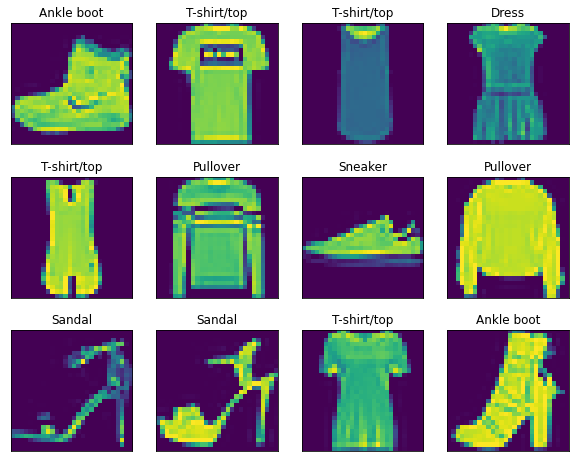

In [7]:
plt.figure(figsize=(10,8))

for i in range(12):
  plt.subplot(3,4, i+1)
  plt.imshow(X_train_full[i])
  index = y_train_full[i]
  plt.title(class_names[index])
  plt.xticks([])
  plt.yticks([])

plt.show()

## 3. Data Pre-Processing

### 3.1 Process the image data



In [8]:
# X_train_full = X_train_full.reshape((60000, 28 * 28))
# X_train_full = X_train_full.astype('float32') / 255

# X_test = X_test.reshape((10000, 28 * 28))
# X_test = X_test.astype('float32') / 255

# Convert target labels to one-hot encoding matrix
y_train_full = keras.utils.to_categorical(y_train_full)
y_test = keras.utils.to_categorical(y_test)


### 3.2 Split the data into Train, Holdout and Dev(test)

In [9]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42)

In [10]:
print("Shape of Training set {}".format(X_train.shape))
print("Shape of Holdout set {}".format(X_valid.shape))

Shape of Training set (48000, 28, 28)
Shape of Holdout set (12000, 28, 28)


## 4. Model Building

A function to construct a network with 3-Dense layers with appropriate input layer will be defined. 

In [11]:
def build_model():
  # L2 regularizer rate
  l2_rate = 01e-3 # 0.001 
  dropout_rate = 0.3 # Dropout rate

  model = keras.models.Sequential()

  model.add(keras.layers.Input(shape=(28, 28, 1)))
  model.add(keras.layers.Flatten())
  model.add(keras.layers.Dense(256, activation='relu',
                               kernel_regularizer=keras.regularizers.L2(l2_rate)))
  model.add(keras.layers.Dropout(dropout_rate))
  model.add(keras.layers.Dense(128, activation='relu',
                            kernel_regularizer=keras.regularizers.L2(l2_rate)))
  model.add(keras.layers.Dropout(dropout_rate))
  model.add(keras.layers.Dense(64, activation='relu',
                            kernel_regularizer=keras.regularizers.L2(l2_rate)))
  model.add(keras.layers.Dropout(dropout_rate))
  model.add(keras.layers.Dense(10, activation='softmax'))

  return model


In [12]:
# Building a model
ffnn_model = build_model()

In [13]:
ffnn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0

## 5. Compile the model

The model is compiled with the following parameters
1. Loss Function - Sparse Categorical Cross Entropy
2. Optimizer - ADAM with learning rate 0.001
3. Metrics - Accuracy

In [14]:
ffnn_model.compile(loss=keras.losses.CategoricalCrossentropy(),
                  optimizer=keras.optimizers.Adam(learning_rate=0.0005),
                  metrics=['accuracy'])

## 6. Train Model

The model will be trained by fitting the training and validation data. 

In [28]:
epochs_run = 30
batchsize = 256

# start time
start_time = time.perf_counter()

# Fitting the data
history = ffnn_model.fit(X_train, 
                         y_train, 
                         epochs=epochs_run, 
                         batch_size=batchsize,
                         validation_data=(X_valid, y_valid), 
                         verbose=1)
# Total time taken for training the given dataset
elapsed = time.perf_counter() - start_time


Epoch 1/30
188/188 [==============================] - 1s 4ms/step - loss: 0.7766 - accuracy: 0.7804 - val_loss: 0.7161 - val_accuracy: 0.8070
Epoch 2/30
188/188 [==============================] - 1s 4ms/step - loss: 0.7583 - accuracy: 0.7817 - val_loss: 0.7014 - val_accuracy: 0.8048
Epoch 3/30
188/188 [==============================] - 1s 4ms/step - loss: 0.7574 - accuracy: 0.7787 - val_loss: 0.6931 - val_accuracy: 0.8010
Epoch 4/30
188/188 [==============================] - 1s 4ms/step - loss: 0.7306 - accuracy: 0.7861 - val_loss: 0.6773 - val_accuracy: 0.8055
Epoch 5/30
188/188 [==============================] - 1s 3ms/step - loss: 0.7057 - accuracy: 0.7915 - val_loss: 0.6674 - val_accuracy: 0.8020
Epoch 6/30
188/188 [==============================] - 1s 3ms/step - loss: 0.6878 - accuracy: 0.7975 - val_loss: 0.6486 - val_accuracy: 0.8049
Epoch 7/30
188/188 [==============================] - 1s 3ms/step - loss: 0.6728 - accuracy: 0.7981 - val_loss: 0.6208 - val_accuracy: 0.8314
Epoch 

In [31]:
val_loss, val_acc = ffnn_model.evaluate(X_valid, y_valid)

print("\n\nValidation Loss {:.3f} and Validation Accuracy {:.2f}%".format(val_loss, val_acc))

375/375 [==============================] - 1s 2ms/step - loss: 0.4669 - accuracy: 0.8560


Validation Loss 0.467 and Validation Accuracy 0.86%


### 6.2 Plot loss and accuracy history graphs.

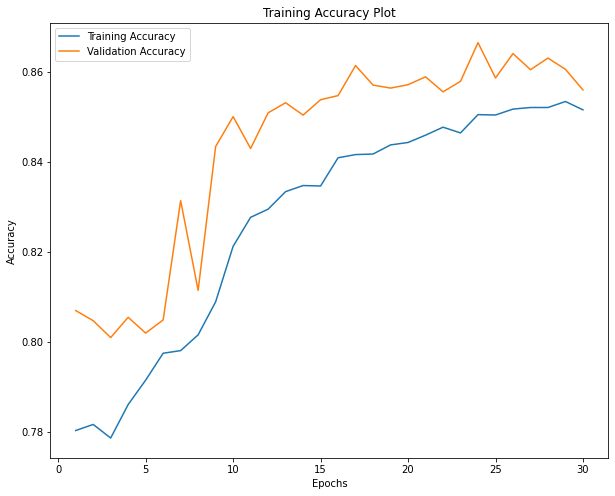

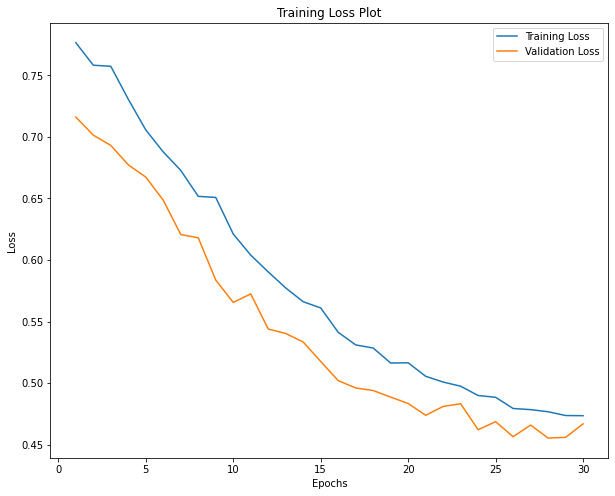

In [32]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
# Loss details
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(10,8))
plt.plot(epochs, acc, label="Training Accuracy")
plt.plot(epochs, val_acc, label="Validation Accuracy")
plt.title("Training Accuracy Plot")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Loss and Validation loss plot
plt.figure(figsize=(10,8))
plt.plot(epochs, loss, label="Training Loss")
plt.plot(epochs, val_loss, label="Validation Loss")
plt.title("Training Loss Plot")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

### Total time taken for training

In [33]:
print("=="*40)
print("Total time taken for training {:.2f} seconds".format(elapsed))
print("=="*40)

Total time taken for training 20.04 seconds


## 7. Model Evaluation

### a. Score with Test data


In [34]:
y_preds = ffnn_model.predict(X_test)

In [35]:
# Converting Logits to Class code using argmax()
y_hat = tf.argmax(y_preds, 1)
rounded_test_labels = tf.argmax(y_test, 1)

In [36]:
y_hat.numpy()

array([9, 2, 1, ..., 8, 1, 5])

In [37]:
print("Confusion Matrix: \n {}".format(classification_report(rounded_test_labels, y_hat.numpy())))

Confusion Matrix: 
               precision    recall  f1-score   support

           0       0.88      0.71      0.79      1000
           1       0.98      0.96      0.97      1000
           2       0.70      0.82      0.75      1000
           3       0.88      0.83      0.85      1000
           4       0.74      0.75      0.74      1000
           5       0.98      0.95      0.96      1000
           6       0.61      0.64      0.62      1000
           7       0.85      0.98      0.91      1000
           8       0.97      0.97      0.97      1000
           9       0.98      0.86      0.92      1000

    accuracy                           0.85     10000
   macro avg       0.86      0.85      0.85     10000
weighted avg       0.86      0.85      0.85     10000

